# Python打造輕鬆辦公室

- CH1. 資料處理 with pandas
- CH2. 資料視覺化簡介
- CH3. 收發電子郵件 with smtp imap
- Final Project
- Extra1. 網路爬取 with requests
- Extra2. 傳送簡訊 with twilio

## CH1 pandas
必學基礎資料處理套件

#### 基本操作1: create, IO, view & summary

In [ ]:
# create pandas objects



# read from csv, excel, and output



# view, stats, summary




In [6]:
import pandas as pd
import os

d = dict(姓名=['aaa','bbb','ccc'],ID=['A12345678','B12345678','C12345678'],age=[12,20,80])
df = pd.DataFrame(d)
print(type(df))
print(type(df['姓名']))

# pd.Series(list(range(100)))
csv_list = ['data/csv/' + i for i in os.listdir('data/csv')]
xls_list = ['data/xlsx/' + i for i in os.listdir('data/xlsx')]

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [20]:
df = pd.read_csv(data_list[3])
# print(df.columns)
print(df.shape)
# print(df.describe())
# print(df.tail(6))
# print(df.head(6))
# df[['Name','Age']]

(18207, 89)


## Awesome summary with pandas_profiling

In [8]:
import pandas_profiling
pandas_profiling.ProfileReport(pd.read_csv(csv_list[4]))

Number of variables,10
Number of observations,53940
Total Missing (%),0.0%
Total size in memory,4.1 MiB
Average record size in memory,80.0 B
Numeric,3
Categorical,3
Boolean,0
Date,0
Text (Unique),0
Rejected,4


#### 基本操作2: select, combine, groupby

In [ ]:
import numpy as np
# select iloc vs loc vs bool
fifa_data = pd.read_csv(csv_list[7])

# concat
df1 = pd.DataFrame(np.random.randn(8, 4), columns=list('ABCD'))
df2 = pd.DataFrame(np.random.randn(8, 4), columns=list('EFGH'))


# groupby
diamond_data = pd.read_csv(csv_list[4])


# value counts

# read_html


In [67]:
df[df['LongPassing']>80].Name
df[(df.Stamina>60) & (df.LongPassing<60) & (df.Nationality.isin(['France','Denmark']))].Name

df[(df.Stamina>90) | (df.LongPassing>90)].Name

#### pandas.read_html

In [104]:
wiki_df = pd.read_html('https://zh.wikipedia.org/wiki/Wikipedia:%E5%AE%A3%E5%91%8A#%E6%A2%9D%E7%9B%AE%E6%95%B8%E9%87%8C%E7%A8%8B%E7%A2%91')

## CH2. 資料視覺化簡介
<p style="font-size: 12px">Python Data Visualization 2018: Why So Many Libraries? <br>
ref: https://www.anaconda.com/python-data-visualization-2018-why-so-many-libraries/</p>

In [166]:
%%html
<img src="https://www.anaconda.com/wp-content/uploads/2019/01/PythonVisLandscape.jpg" width="900" height="900">

In [3]:
%%html
<iframe src="https://python-graph-gallery.com/" width="1200" height="900"></iframe>

## My Recommendation

- matplotlib
- seaborn
- folium (leaflet)
- plotly
- bokeh
- dash (plotly)

## matplotlib

In [112]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def draw_matplotlib():
    np.random.seed(19680801)

    mu = 200
    sigma = 25
    x = np.random.normal(mu, sigma, size=100)

    fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 4))

    ax0.hist(x, 20, density=1, histtype='stepfilled', facecolor='g', alpha=0.75)
    ax0.set_title('stepfilled')

    # Create a histogram by providing the bin edges (unequally spaced).
    bins = [100, 150, 180, 195, 205, 220, 250, 300]
    ax1.hist(x, bins, density=1, histtype='bar', rwidth=0.8)
    ax1.set_title('unequal bins')

    fig.tight_layout()
    plt.show()

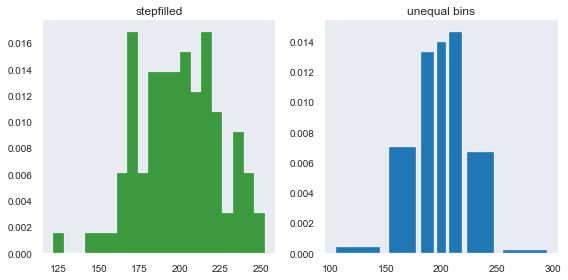

In [113]:
draw_matplotlib()

## seaborn

In [108]:
import seaborn as sns

def draw_seaborn(color = 'G'):
    sns.set_style("dark")
    df = pd.read_csv(data_list[4])
    df = df[df.color==color]
    plt.figure(figsize=(15,8))
    cmap = sns.cubehelix_palette(8, start=.5, rot=-.75)
    ax = sns.scatterplot(x="table", y="carat",size="depth",hue='clarity',sizes=(0,100),data=df,palette=cmap)
    plt.title(f'Diamond data with color: {color}', fontsize=20)
    plt.show()

df = pd.read_csv(data_list[4])
print(df.color.unique())
# replot('E')

['E' 'I' 'J' 'H' 'F' 'G' 'D']


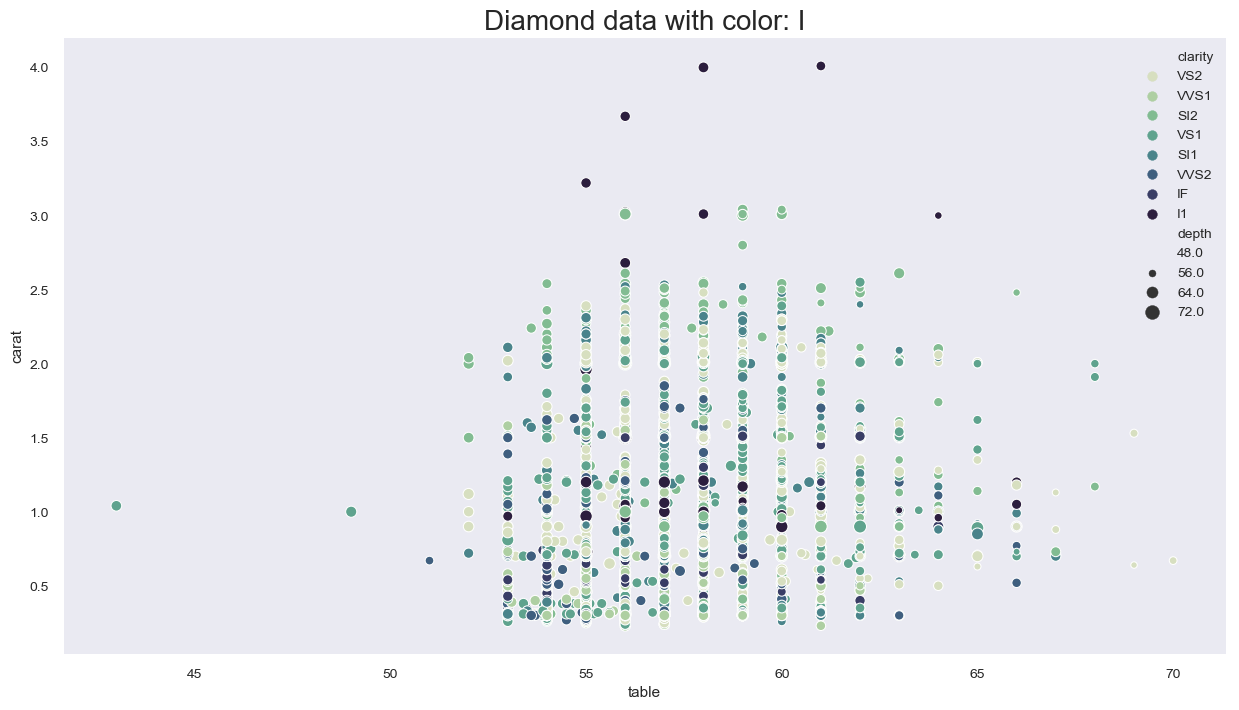

In [109]:
draw_seaborn('I')

## folium

In [93]:
import folium

def draw_folium():
    m = folium.Map(
        location=[24.747219, 121.746751],
        zoom_start=15,
        tiles='cartodbpositron'
    )
    folium.Marker([24.747219, 121.746751], popup='<b>現在正在上python實務應用</b>', tooltip='check out').add_to(m)
    return m

In [94]:
m = draw_folium()
m

## plotly

In [1]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
# Create random data with numpy
import numpy as np

def draw_plotly():
    init_notebook_mode(connected=True)

    N = 1000
    random_x = np.random.randn(N)
    random_y = np.random.randn(N)

    # Create a trace
    trace = go.Scatter(
        x = random_x,
        y = random_y,
        mode = 'markers')

    data = [trace]

    # Plot and embed in ipython notebook!
    iplot(data)

In [2]:
draw_plotly()

## Bokeh

In [101]:
import numpy as np
import pandas as pd

from bokeh.core.properties import value
from bokeh.plotting import figure, show, output_file, output_notebook
from bokeh.palettes import brewer

def draw_bokeh():
    output_notebook()
    # output_file
    # output_file('stacked_area.html')
    N = 10
    df = pd.DataFrame(np.random.randint(10, 100, size=(15, N))).add_prefix('y')

    p = figure(x_range=(0, len(df)-1), y_range=(0, 800))
    p.grid.minor_grid_line_color = '#eeeeee'

    names = ["y%d" % i for i in range(N)]
    p.varea_stack(stackers=names, x='index', color=brewer['Spectral'][N], legend=[value(x) for x in names], source=df)

    # reverse the legend entries to match the stacked order
    p.legend[0].items.reverse()

    show(p)

In [114]:
draw_bokeh()

Loading BokehJS ...

## dash python

https://dash-gallery.plotly.host/dash-uber-rides/

# Send Email by Python

<img src='https://cdn-images-1.medium.com/max/1080/0*WckBlFQffDqRRHC6.png'>

照片來源: https://medium.com/@rinu.gour123/python-send-email-via-smtp-ad2d259d7240

你需要一個支援smtp (simple mail transfer protocol)的email帳號作為寄件伺服器，如gmail。<br><br>

常見domain:

yahoo: smtp.mail.yahoo.com
gmail: smtp.gmail.com
hotmail: smtp.live.com


gmail需修改安全設定。<br><br>


直接參考並改寫他人程式碼，如下: <br>
ref1: https://realpython.com/python-send-email/ <br>
ref2: https://stackoverflow.com/questions/3362600/how-to-send-email-attachments

## Demo in Spyder

## Final Project
<p style="font-size:28px">
你是某某遊樂園的員工，每天下班時，你們必須將今日的散客入園人數、團客入園人數記錄下來，紀錄在一份excel檔案裡。而每周末要把這一周的資料製作成圖表，寄給你的主管。你有辦法寫出一隻自動化程式處理嗎?</p>

<p style="font-size:28px">
資料如下:
</p>

In [11]:
import datetime
import numpy as np
import pandas as pd
date = []
for i in range(100):
    date.append(datetime.date(2019,3,10) + datetime.timedelta(days=i))
people = np.random.randint(500,1000,100)
group_people = np.random.randint(300,2000,100)
    
df = pd.DataFrame(dict(日期=date,散客人數=people,團客人數=group_people))
# df.to_excel('入園資料.xlsx',index=False)
df.head(6)

,日期,散客人數,團客人數
0,2019-03-10,753,1189
1,2019-03-11,784,1308
2,2019-03-12,603,903
3,2019-03-13,930,413
4,2019-03-14,898,533
5,2019-03-15,715,885


每7天，打開上面的這份檔案，將最後7天的資料繪圖，範例如下:

In [9]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
def draw_fig():
    font_path = "msjh.ttc"
    prop1 = font_manager.FontProperties(fname=font_path,size=30)
    prop2 = font_manager.FontProperties(fname=font_path,size=40)

    df = pd.read_excel('入園資料.xlsx')
    data = df.tail(7) #抓取最後7天的資料

    p = data.散客人數.tolist()
    gp = data.團客人數.tolist()
    date = [str(d).replace(' 00:00:00', '') for d in data.日期.tolist()]

    ind = np.arange(len(p))
    width = 0.35

    plt.rcParams["figure.figsize"] = (20,10)
    fig,ax = plt.subplots()
    title = f'{date[0]}到{date[-1]}間入園人數'
    ax.bar(ind - width/2, p, width,label='散客人數',color='#692db7')
    ax.bar(ind + width/2, gp, width,label='團客人數',color='#ffc15e')

    ax.set_ylabel('人數',fontproperties=prop1,rotation='horizontal')
    ax.set_ylabel('日期',fontproperties=prop1,rotation='horizontal')
    ax.set_title(title,fontproperties=prop2)
    ax.set_xticks(ind)
    ax.set_xticklabels(date)
    plt.legend(prop=prop1)

    plt.savefig('入園人數.png')
    plt.show()

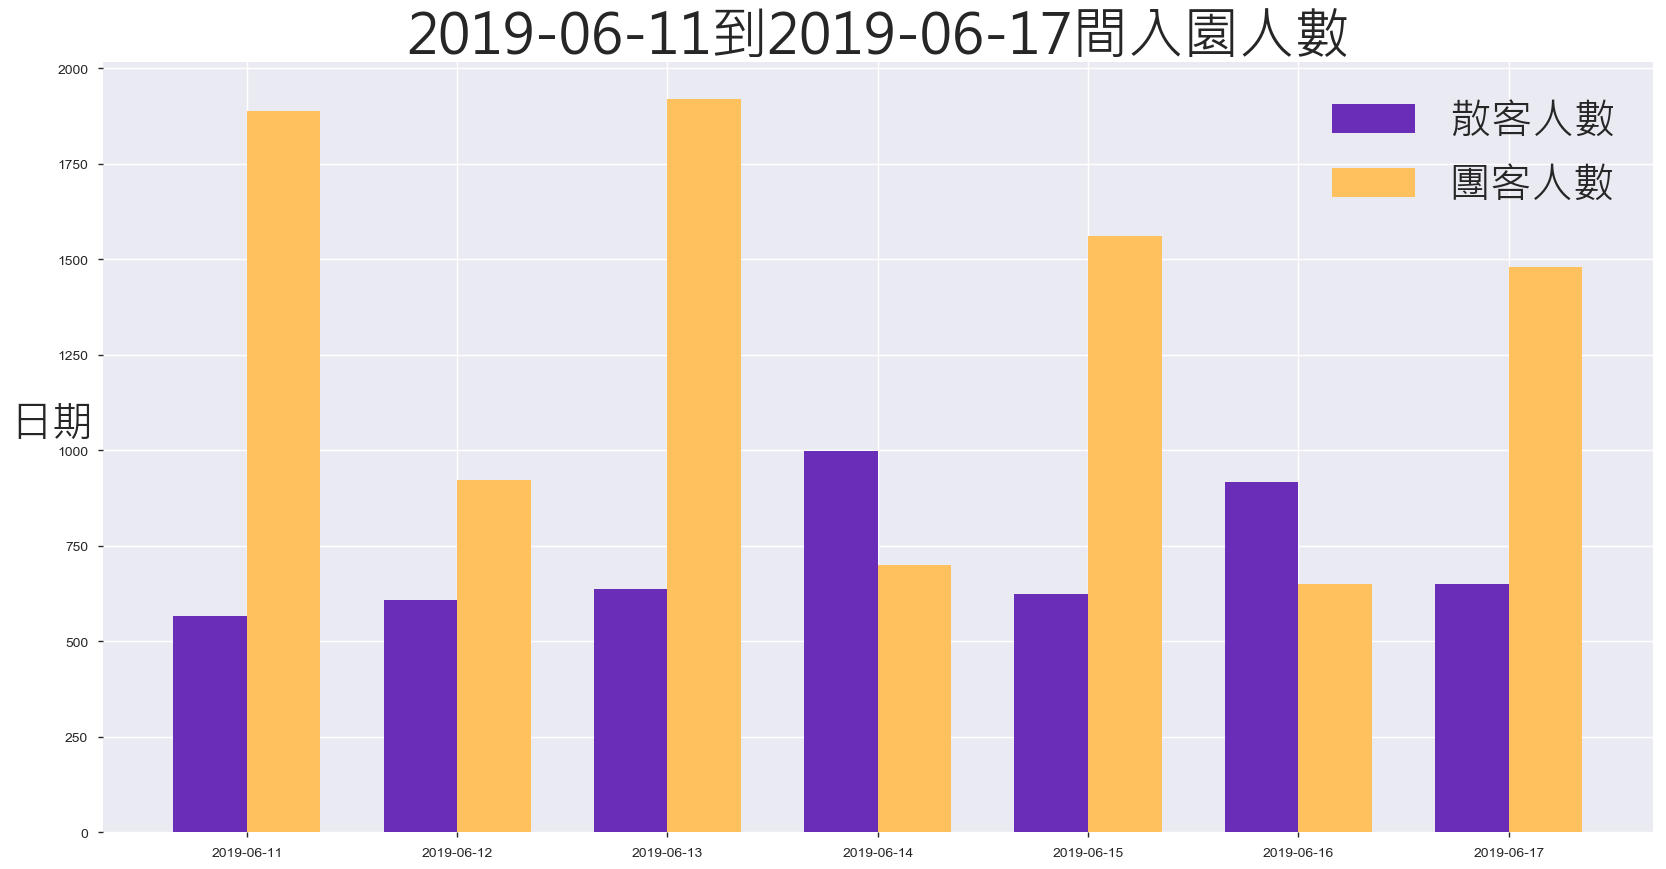

In [12]:
draw_fig()

編寫排程器，每隔一段時間(7天)，畫圖，寫email，寄給主管，email內容請自己隨便掰。

這是練習，所以試試看能不能每隔2分鐘寄信出去，寄到我的gmail: even311379@gmail.com <br>
為了讓偷偷捕7天的資料，我再幫各位寫一段程式碼，模擬7天間每天有人打開**入園資料.xlsx**，在每次要畫圖時跑一次這段程式碼。

In [73]:
def add_7_days():
    df = pd.read_excel('入園資料.xlsx')
    date = []
    people = np.random.randint(500,1000,7)
    group_people = np.random.randint(300,2000,7)
    for i in range(7):
        date.append(df.iloc[-1].日期.to_pydatetime() + datetime.timedelta(days=i+1))

    ndf = pd.DataFrame(dict(日期=date,散客人數=people,團客人數=group_people))

    pd.concat([df,ndf],axis=0,ignore_index=True).to_excel('入園資料.xlsx')

# 請加油~

In [4]:
import utils
utils.my_timer(60)

time up! 
